In [1]:
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("darkgrid")

fd = pd.read_csv('spotify_data.csv')

fd.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [2]:
fd = fd.iloc[:, 2:16]

In [4]:
from sklearn.preprocessing import LabelEncoder

# Misalkan kolom 'Gender' adalah kolom string yang ingin diubah
le = LabelEncoder()
fd['song_title'] = le.fit_transform(fd['song_title'])

fd.head()

,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title
0,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,1043
1,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,1334
2,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,1906
3,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,1044
4,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,1243


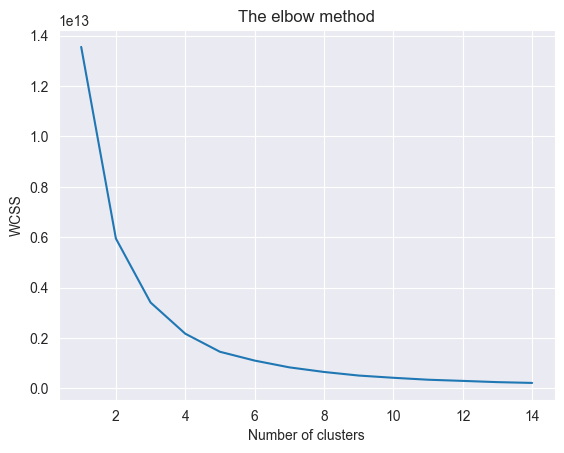

In [5]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(fd)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()


In [6]:
model = KMeans(n_clusters=5)
model.fit(fd)


D:\Program\Pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

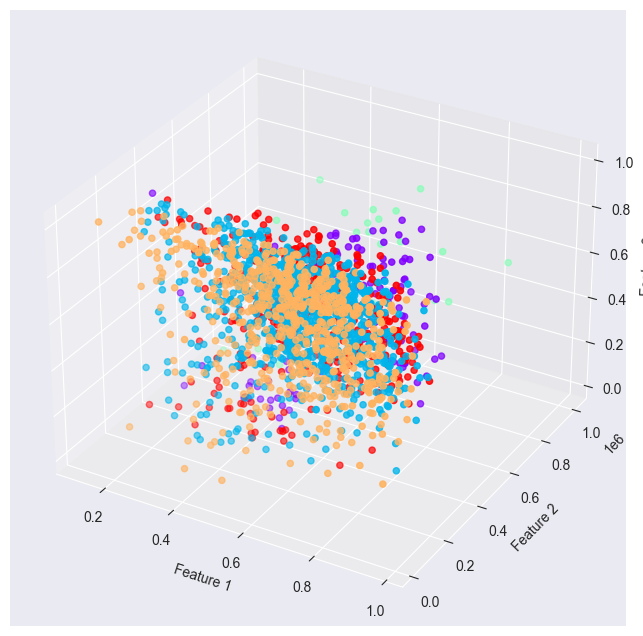

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot untuk data
ax.scatter(fd.iloc[:, 0], fd.iloc[:, 1], fd.iloc[:, 2], c=model.labels_, cmap='rainbow')

# Label sumbu
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()


In [8]:
print(model.cluster_centers_)

[[ 6.57943548e-01  4.17840073e+05  5.90810484e-01  4.26390304e-01
   5.67741935e+00  1.64004032e-01 -1.04763065e+01  5.32258065e-01
   6.74709677e-02  1.17457419e+02  3.96774194e+00  4.58454032e-01
   7.58064516e-01  9.54725806e+02]
 [ 6.15038417e-01  2.34851828e+05  6.89853318e-01  8.43825032e-02
   5.34342258e+00  1.89186496e-01 -6.63375902e+00  6.23981374e-01
   8.98969732e-02  1.21900268e+02  3.97788126e+00  4.85631548e-01
   4.55180442e-01  9.87802095e+02]
 [ 5.45038462e-01  6.56582615e+05  5.96361538e-01  3.90602581e-01
   4.61538462e+00  2.87357692e-01 -1.08815000e+01  4.61538462e-01
   6.28961538e-02  1.07958962e+02  3.92307692e+00  4.47061538e-01
   7.30769231e-01  1.33180769e+03]
 [ 6.20175194e-01  1.80349462e+05  7.05781705e-01  8.92426804e-02
   5.11317829e+00  1.90197674e-01 -6.45820310e+00  6.43410853e-01
   1.01347132e-01  1.23130724e+02  3.97054264e+00  5.45309767e-01
   4.52713178e-01  9.76982946e+02]
 [ 6.15068871e-01  3.02625785e+05  6.56093664e-01  2.08712803e-01
  

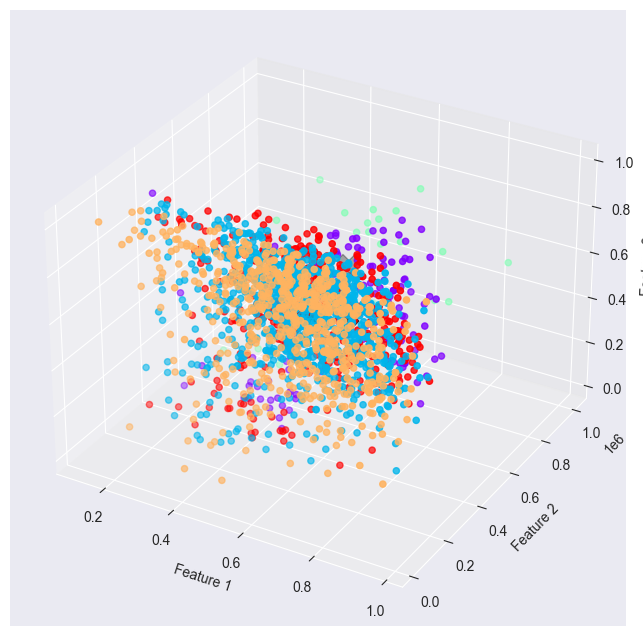

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot untuk data
ax.scatter(fd.iloc[:, 0], fd.iloc[:, 1], fd.iloc[:, 2], c=model.labels_, cmap='rainbow')

# Centroids
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], c=['black'], marker='X', s=300)

# Label sumbu
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()
